In [2]:
import scipy as sp
from scipy.sparse import spdiags
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve
import numpy as np
import matplotlib.pyplot as plt

# Problem 1

Use the finite element method to solve
 
εy" − y' = −1,

y(0) = α, y(1) = β,


where α = 2, β = 4, and ε = 0.02. Use N = 100 finite elements (101 grid points). Compare
your solution with the analytic solution

y(x) = α + x + (β − α − 1)* (e^(x/ε) − 1)/(e^(1/ε) − 1) by graphing.


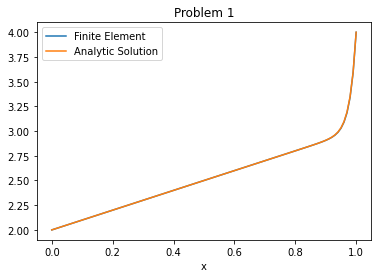

In [13]:
alpha = 2
beta = 4
eps = .02
N = 100
h = 1/100  #H is constant for this first problem




#Define a and L functions
def a(i,j): #cases
    if j== i+1:
        return eps/h + 1/2
    elif j==i:
        return -eps/h - eps /h 
    elif j ==i-1:
        return eps/h - 1/2
    else:
        return 0
    
def L(j):
    return -(1/2)* (h + h)

N = 100
#construct the diagonals for the A Matrix
first_diag = [a(i,i+1) for i in range(N-1)]
first_diag.append(0)
second_diag = [a(i,i) for i in range(1, N)]
second_diag.insert(0,1)
second_diag.append(1)
third_diag = [a(i+1,i) for i in range(N-1)]
third_diag.insert(0,0)

A = np.diag(first_diag, k = -1) + np.diag(second_diag, k= 0) + np.diag(third_diag, k = 1) #A Matrix

phi  = [L(i) for i in range(1, N)]
phi.insert(0,alpha) #insert the extra edge values
phi.append(beta)


def analytic(x, alpha, beta, eps): #Analytic Solution
  return alpha + x + (beta - alpha - 1)* ((np.exp(x/eps)-1)/ (np.exp(1/eps) -1))

k= np.linalg.solve(A, phi)

x = np.linspace(0,1,101)
plt.plot(np.linspace(0,1,101), k , label = "Finite Element")
plt.plot(np.linspace(0,1,101), [analytic(X, alpha, beta, eps) for X in x], label= "Analytic Solution")
plt.legend()
plt.title("Problem 1")
plt.xlabel('x')
plt.show()



In [4]:
#We'll keep k from the first problem for our evenly spaced, but now we gotta fix h

even_grid = np.linspace(0,1,15)
h_even = [even_grid[i] - even_grid[i-1] for i in range(1, len(even_grid))]
#h_even.insert(0,0)

clustered_grid = np.linspace(0,1,15)**(1./8)
h_clustered = [clustered_grid[i] - clustered_grid[i-1] for i in range(1, len(clustered_grid))]
#h_clustered.insert(0,0)


In [12]:

def new_a(i,j,H): #Now we want to do it for varied intervals

    if j== i+1: #Cases
        return eps/H[i] + 1/2
    elif j==i:
        return -eps/H[i] - (eps /H[i+1])
    elif j ==i-1:
        return eps/H[i] - 1/2
    else:
        return 0
    
def new_L(j,h): #Same here, varied intervals so create a new function
    return -(1/2)* (h[j] + h[j+1])

In [9]:
N = 14 #Set up constants
alpha = 2
beta = 4
eps = .02


#Construct the diagonals
first_diag = [new_a(i,i+1, h_clustered) for i in range(N-1)]
first_diag.append(0)
second_diag = [new_a(i,i, h_clustered) for i in range(0, N-1)]
second_diag.insert(0,1)
second_diag.append(1)
third_diag = [new_a(i+1,i, h_clustered) for i in range(N-1)]
third_diag.insert(0,0)

A_clustered = np.diag(first_diag, k = -1) + np.diag(second_diag, k= 0) + np.diag(third_diag, k = 1) #A matrix



phi_clustered  = [new_L(i, h_clustered) for i in range(0, N-1)]
phi_clustered.insert(0,alpha)
phi_clustered.append(beta)


#This is the solution
clustered = np.linalg.solve(A_clustered, phi_clustered)

#Now do it for the evenly spaced ones
N = 14
first_diag = [new_a(i,i+1, h_even) for i in range(N-1)]
first_diag.append(0)
second_diag = [new_a(i,i, h_even) for i in range(0, N-1)]
second_diag.insert(0,1)
second_diag.append(1)
third_diag = [new_a(i+1,i, h_even) for i in range(N-1)]
third_diag.insert(0,0)

A = np.diag(first_diag, k = -1) + np.diag(second_diag, k= 0) + np.diag(third_diag, k = 1)


phi  = [new_L(i, h_even) for i in range(0, N-1)]
phi.insert(0,alpha)
phi.append(beta)

#The solution for even
even = np.linalg.solve(A, phi)



# Problem 2

Compare the numerical solution when the grid points are unevenly spaced versus when the grid points
are clustered in the area of greatest change by plotting.

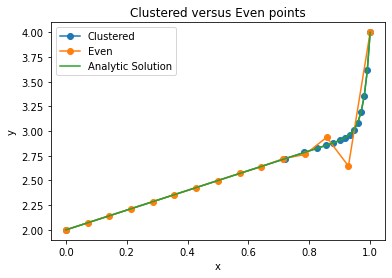

In [11]:
x = np.linspace(0,1,15) #Linspace of 15 points

plt.plot(clustered_grid, clustered , label = "Clustered", marker = 'o') #Plot clustered ones
plt.plot(even_grid, even , label = "Even", marker = 'o')
plt.plot(np.linspace(0,1,101), [analytic(X, alpha, beta, eps) for X in np.linspace(0,1,101)], label= "Analytic Solution") #Using same analytic solution
plt.title("Clustered versus Even points")
plt.xlabel("x")
plt.ylabel("y")
plt.legend() #don't forget the legend

# Problem 3

Solve (11.5) with the finite element method using N = 2^i finite elements, i = 4, 5, . . . , 21.

Use a log-log plot to graph the error.